## Estimation if a Client is Custodian or not (for banks)


### Contexte: 
We want to implement an appropriate model to identify whether the bank's client is a custodian or not
### Dataset
Our dataset 'bank_full.csv' contains information about all the customers of the bank. 
The dataset contains 16 independent variables ( age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, compaign, pdays, previous, poutcome) and one dependent variable (target).
There are many columns that are not numerical.

In [1]:
import pandas as pd
import numpy as np

### Load Dataset

In [84]:
df = pd.read_csv("bank-full.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


### Exploration des données

In [6]:
# demensions
df.shape

(45211, 17)

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<AxesSubplot:>

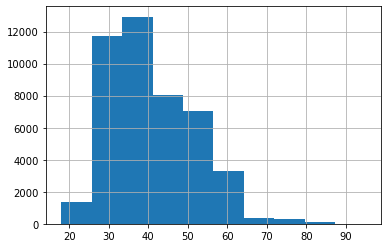

In [8]:
#histogram age
df["age"].hist()

[Text(0, 0, 'management'),
 Text(1, 0, 'technician'),
 Text(2, 0, 'entrepreneur'),
 Text(3, 0, 'blue-collar'),
 Text(4, 0, 'unknown'),
 Text(5, 0, 'retired'),
 Text(6, 0, 'admin.'),
 Text(7, 0, 'services'),
 Text(8, 0, 'self-employed'),
 Text(9, 0, 'unemployed'),
 Text(10, 0, 'housemaid'),
 Text(11, 0, 'student')]

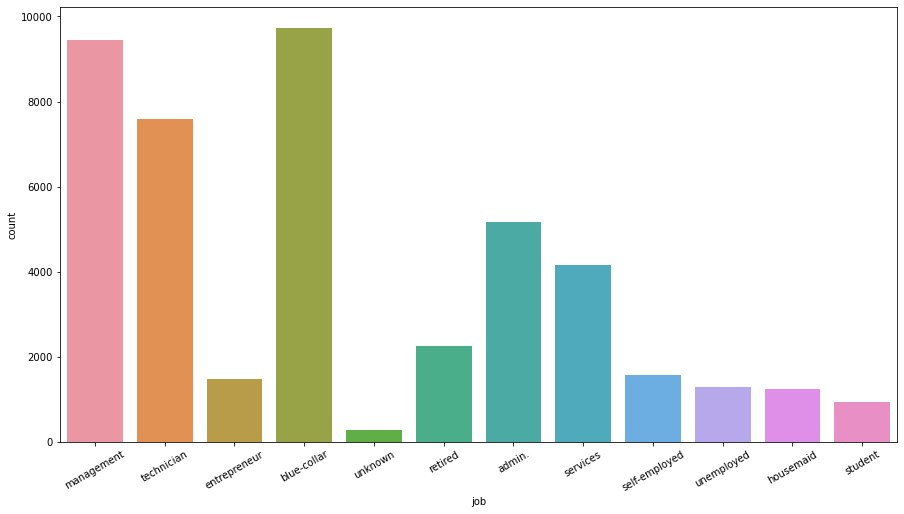

In [16]:
#countplot job
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))
ax = sns.countplot(x = 'job',data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

[Text(0, 0, 'married'), Text(1, 0, 'single'), Text(2, 0, 'divorced')]

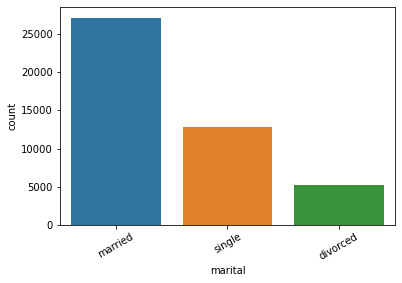

In [17]:
#countplot Marital status
ax = sns.countplot(x = 'marital',data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

[Text(0, 0, 'tertiary'),
 Text(1, 0, 'secondary'),
 Text(2, 0, 'unknown'),
 Text(3, 0, 'primary')]

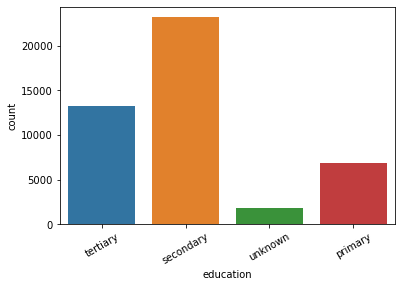

In [18]:
#countplot education level
ax = sns.countplot(x = 'education',data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

[Text(0, 0, 'yes'), Text(1, 0, 'no')]

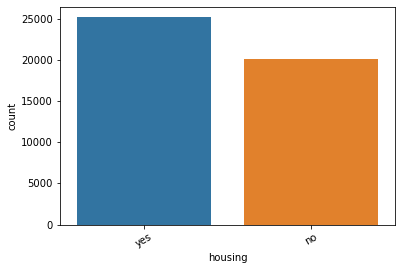

In [19]:
#countplot housing
ax = sns.countplot(x = 'housing',data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

[Text(0, 0, 'no'), Text(1, 0, 'yes')]

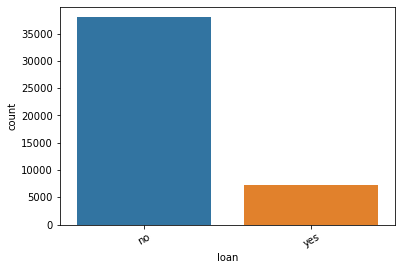

In [20]:
#countplot loan
ax = sns.countplot(x = 'loan',data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

In [21]:
#Encoding of categorical variables
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Get Unique Values of Categorical features

In [85]:
for i in df:
    print(f'{i} has {df[i].nunique()} that are = {df[i].unique()}')

age has 77 that are = [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job has 12 that are = ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital has 3 that are = ['married' 'single' 'divorced']
education has 4 that are = ['tertiary' 'secondary' 'unknown' 'primary']
default has 2 that are = ['no' 'yes']
balance has 7168 that are = [ 2143    29     2 ...  8205 14204 16353]
housing has 2 that are = ['yes' 'no']
loan has 2 that are = ['no' 'yes']
contact has 3 that are = ['unknown' 'cellular' 'telephone']
day has 31 that are = [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month has 12 that are = ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'ma

## Label Encoding for categorical features that has only 2 values

In [86]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in df[["default","housing","loan","Target"]]:
    df[i] = label_encoder.fit_transform(df[i])

In [87]:
df[df["job"]=="unknown"].shape

(288, 17)

## Dealing with missing Values (drop "job" missing values, imputate "education" and "contact" missing values with mode)

In [88]:
df= df[df["job"]!="unknown"]
df.loc[df['education'] =="unknown", 'education'] = df["education"].mode()[0]
df.loc[df['contact'] =="unknown", 'contact'] = df["contact"].mode()[0]

## Ordinal Encoding for education (because the unique values are ordered)

In [89]:
df["education"].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [90]:
from sklearn.preprocessing import OrdinalEncoder
ordinalEnco = OrdinalEncoder()
df["education"] = ordinalEnco.fit_transform(df[["education"]])

## Label Encoding for "month" and "contact"

In [91]:
df["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [92]:
df["contact"].unique()

array(['cellular', 'telephone'], dtype=object)

In [93]:
df["month"] = label_encoder.fit_transform(df[["month"]])
df["contact"] = label_encoder.fit_transform(df[["contact"]])

C:\Users\rouka\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## imputate missing values for poutcome with mode

In [94]:
df["poutcome"] = df["poutcome"].replace("unknown",np.nan)
df["poutcome"] = df["poutcome"].fillna(df["poutcome"].mode()[0])
df["poutcome"].unique()

array(['failure', 'other', 'success'], dtype=object)

## Ordinal Encoding "poutcome" failure = 0 , other = 1, success = 2

In [95]:
encoder = OrdinalEncoder(categories=[['failure','other','success']])
df["poutcome"] = encoder.fit_transform(df["poutcome"].values.reshape(-1,1))

## OneHotEncoding for "marital" and "job"

In [96]:
df = pd.get_dummies(df, columns =["marital"])
df = pd.get_dummies(df, columns =["job"])

In [97]:
df.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,58,2.0,0,2143,1,0,0,5,8,261,...,0,0,0,1,0,0,0,0,0,0
1,44,1.0,0,29,1,0,0,5,8,151,...,0,0,0,0,0,0,0,0,1,0
2,33,1.0,0,2,1,1,0,5,8,76,...,0,1,0,0,0,0,0,0,0,0
3,47,1.0,0,1506,1,0,0,5,8,92,...,1,0,0,0,0,0,0,0,0,0
5,35,2.0,0,231,1,0,0,5,8,139,...,0,0,0,1,0,0,0,0,0,0


In [98]:
df.shape

(44923, 29)

In [99]:
# corrlation matrix 
df.corr()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
age,1.000000,-0.164958,-0.017675,0.097949,-0.182947,-0.013977,0.168374,-0.007833,-0.042411,-0.004521,...,-0.042125,0.022638,0.087731,-0.021620,0.450421,-0.007362,-0.064817,-0.197627,-0.067173,0.001110
education,-0.164958,1.000000,-0.011757,0.067543,-0.077154,-0.025924,-0.069769,0.025266,-0.075782,0.002460,...,-0.414739,0.055121,-0.131660,0.514254,-0.117669,0.088141,-0.087196,0.010514,0.065262,-0.031592
default,-0.017675,-0.011757,1.000000,-0.066762,-0.006835,0.077196,-0.016934,0.009520,0.011355,-0.009964,...,0.010083,0.026219,-0.000450,-0.002936,-0.011429,0.004011,-0.000102,-0.016322,-0.003336,0.006387
balance,0.097949,0.067543,-0.066762,1.000000,-0.068381,-0.084233,0.038196,0.004849,0.020538,0.021629,...,-0.048497,0.009833,0.001812,0.068511,0.047252,0.018072,-0.038006,0.001363,-0.015854,0.009201
housing,-0.182947,-0.077154,-0.006835,-0.068381,1.000000,0.038911,-0.079184,-0.028951,0.271880,0.004787,...,0.175162,0.009530,-0.080709,-0.066787,-0.158654,-0.028576,0.068814,-0.086281,-0.015593,-0.049460
loan,-0.013977,-0.025924,0.077196,-0.084233,0.038911,1.000000,-0.012133,0.010897,0.021759,-0.012966,...,0.016981,0.039374,-0.017680,-0.040287,-0.015464,-0.008376,0.034802,-0.058929,0.013669,-0.036435
contact,0.168374,-0.069769,-0.016934,0.038196,-0.079184,-0.012133,1.000000,0.023454,-0.005243,-0.022636,...,-0.001900,-0.003908,0.040099,-0.029327,0.108719,-0.001251,-0.011476,0.025049,-0.039563,0.009260
day,-0.007833,0.025266,0.009520,0.004849,-0.028951,0.010897,0.023454,1.000000,-0.006320,-0.030302,...,-0.023470,-0.002486,0.003818,0.018640,-0.010367,0.004909,-0.006843,-0.016082,0.032247,-0.006560
month,-0.042411,-0.075782,0.011355,0.020538,0.271880,0.021759,-0.005243,-0.006320,1.000000,0.006303,...,0.089941,0.037531,-0.036781,-0.058257,-0.024719,0.003926,0.038651,-0.001514,-0.083906,-0.004640
duration,-0.004521,0.002460,-0.009964,0.021629,0.004787,-0.012966,-0.022636,-0.030302,0.006303,1.000000,...,0.009400,-0.001425,-0.008152,-0.008615,0.025983,0.007304,0.001268,-0.006595,-0.009435,0.020286


<AxesSubplot:>

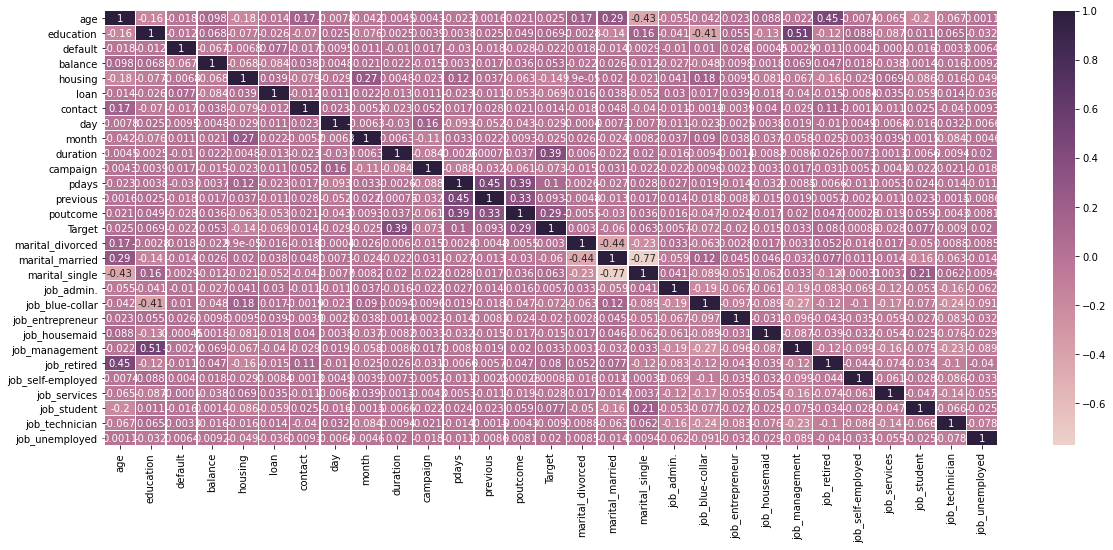

In [100]:
# correlation plot---heatmap
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,8))        
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax,cmap=sns.cubehelix_palette(as_cmap=True))

# Modeling

In [102]:
#split data X and Y
X=df.drop('Target',axis=1)
y=df['Target']

## Check if target is Imbalanced

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

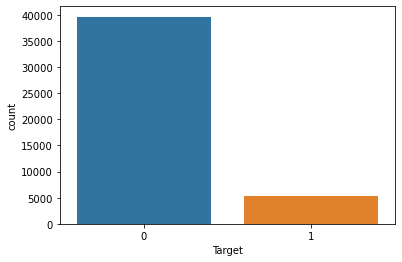

In [104]:
sns.countplot(y)

## OverSample Data to get a balanced target

In [105]:
from imblearn.over_sampling import SMOTE
os = SMOTE()
X,y = os.fit_resample(X,y)

C:\Users\rouka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

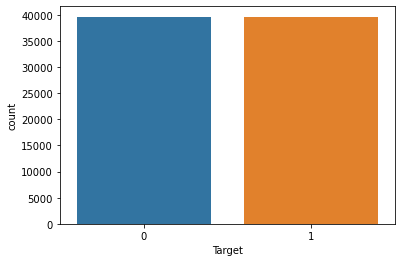

In [106]:
sns.countplot(y)

## Split Data

In [107]:
# Split X and y into training and test set in 70,30 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Decision Tree Model

In [123]:
DecisionTreeClassifier?

Test set accuracy: 0.77
              precision    recall  f1-score   support

           0       0.75      0.81      0.78     11977
           1       0.79      0.72      0.75     11824

    accuracy                           0.77     23801
   macro avg       0.77      0.77      0.77     23801
weighted avg       0.77      0.77      0.77     23801



<AxesSubplot:>

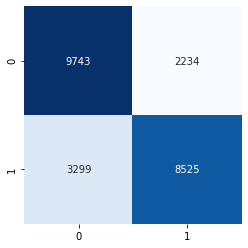

In [124]:
#Fit, predict                             
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2, criterion='gini', random_state=1,splitter="best")
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
#print(y_pred[0:5])
# Import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(y_test, y_pred))
#Evaluate the model using accuracy and confusion matrix
matrix_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)


In [155]:
Actual_Pred_DT = pd.DataFrame( { "actual": y_test, "predicted_prob": dt.predict( ( X_test ) ) } ) 
Actual_Pred_DT

,actual,predicted_prob
51062,1,1
49326,1,0
8760,0,0
77944,1,0
24397,0,1
...,...,...
58200,1,1
35245,0,0
2230,0,0
78389,1,1


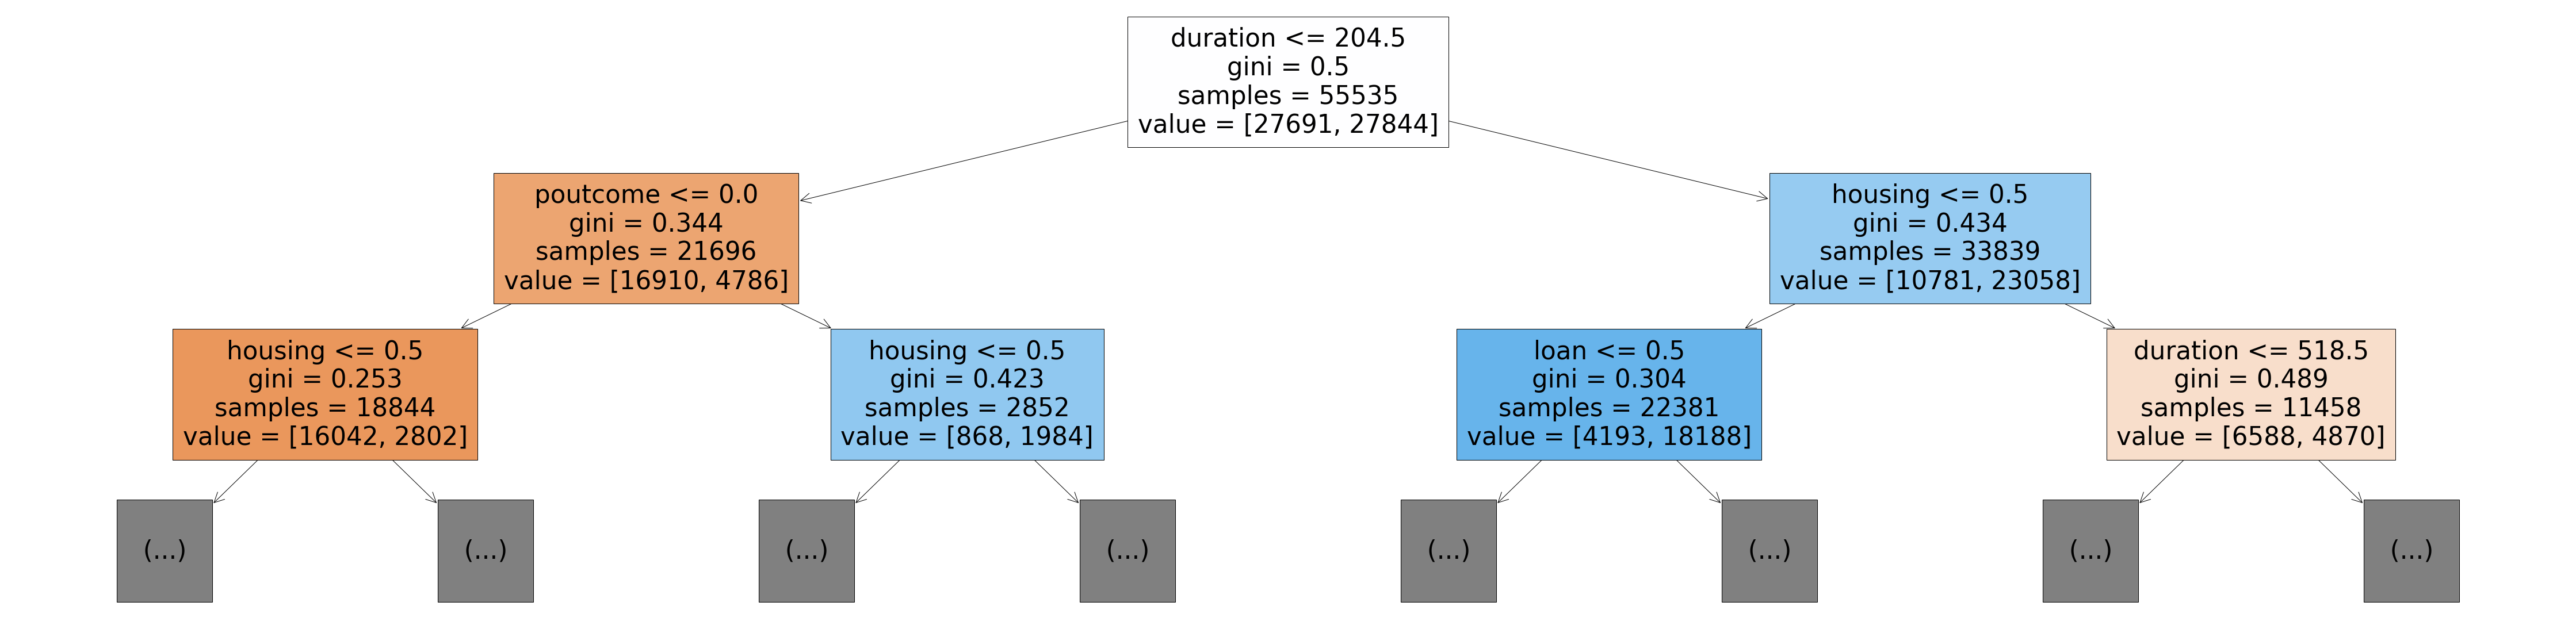

In [118]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))
plot_tree(dt, feature_names=X_train.columns, max_depth=2, filled=True);

###  HyperParameter Tunning for Decision Tree Classifier

In [150]:
# for max_d in range(1,21):
#     model = DecisionTreeClassifier(max_depth=max_d, random_state=1)
#     model.fit(X_train, y_train)
#     print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(X_train,y_train))
#     print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(X_test,y_test))
#     print('')

### Random Forest Classifier

Test set accuracy: 0.83
              precision    recall  f1-score   support

           0       0.82      0.85      0.83     11977
           1       0.84      0.81      0.82     11824

    accuracy                           0.83     23801
   macro avg       0.83      0.83      0.83     23801
weighted avg       0.83      0.83      0.83     23801



<AxesSubplot:>

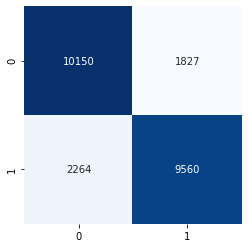

In [125]:
#fit, predict
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=1)
clf.fit(X, y)
y_predRF = clf.predict(X_test)
acc = accuracy_score(y_test, y_predRF)
print("Test set accuracy: {:.2f}".format(acc))
print(classification_report(y_test, y_predRF))
matrix_confusion = confusion_matrix(y_test, y_predRF)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [156]:
Actual_Pred_RF = pd.DataFrame( { "actual": y_test, "predicted_prob": clf.predict( ( X_test ) ) } ) 
Actual_Pred_RF

,actual,predicted_prob
51062,1,1
49326,1,0
8760,0,0
77944,1,1
24397,0,1
...,...,...
58200,1,1
35245,0,0
2230,0,0
78389,1,1


### Ensemble Learning Adaboost

Test set accuracy: 0.94
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11977
           1       0.96      0.91      0.93     11824

    accuracy                           0.94     23801
   macro avg       0.94      0.94      0.94     23801
weighted avg       0.94      0.94      0.94     23801



<AxesSubplot:>

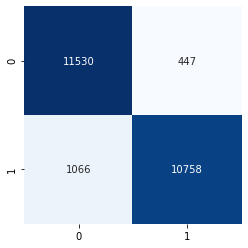

In [152]:
#Fit, predict
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=1000, random_state=1)
ada.fit(X, y)

predAda = ada.predict(X_test)
accADA = accuracy_score(y_test,predAda)
print("Test set accuracy: {:.2f}".format(accADA))
print(classification_report(y_test, predAda))
matrix_confusion = confusion_matrix(y_test, predAda)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [157]:
Actual_Pred_ADA = pd.DataFrame( { "actual": y_test, "predicted_prob": ada.predict( ( X_test ) ) } ) 
Actual_Pred_ADA

,actual,predicted_prob
51062,1,1
49326,1,1
8760,0,0
77944,1,1
24397,0,0
...,...,...
58200,1,1
35245,0,0
2230,0,0
78389,1,1
